# W-C_test1.ipynb

Testing paramters for the basic E-I network that is the builidng block of the C spinal component in base_v3.

In [1]:
%cd ../..
import numpy as np
import matplotlib.pyplot as plt
import time

/home/z/projects/draculab


In [2]:
%load_ext Cython

In [3]:
%%cython
from draculab import *

In [106]:
# create network
net_params = {'min_delay' : 0.005,
              'min_buff_size' : 10 }
net = network(net_params)

# create units
CE_params = {'type' : unit_types.sigmoidal,
             'thresh' : -0.,
             'slope' : 1.5,
             'init_val' : 0.2,
             'tau' : 0.02 }

CI_params = {'type' : unit_types.sigmoidal,
             'thresh' : 0.5,
             'slope' : 2.,
             'init_val' : 0.2,
             'tau' : 0.02 }

CE = net.create(1, CE_params)
CI = net.create(1, CI_params)

# connect
CE__CE_conn = {'rule' : 'one_to_one',
               'delay' : 0.01 }
CE__CI_conn = {'rule' : 'one_to_one',
               'delay' : 0.01 }
CI__CE_conn = {'rule' : 'one_to_one',
               'delay' : 0.01 }

CE__CE_syn = {'type' : synapse_types.static,
              'init_w' : .0 }
CE__CI_syn = {'type' : synapse_types.static,
              'init_w' : 1. }
CI__CE_syn = {'type' : synapse_types.static,
              'init_w' : -2. }

net.connect(CE, CE, CE__CE_conn, CE__CE_syn)
net.connect(CE, CI, CE__CI_conn, CE__CI_syn)
net.connect(CI, CE, CI__CE_conn, CI__CE_syn)

In [107]:
# simulate
times, data, _ = net.run(5.)

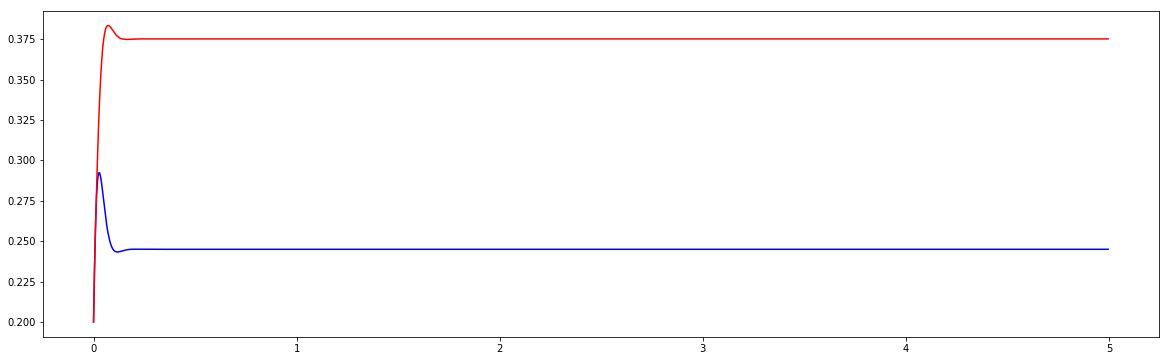

In [108]:
# plot
fs = (20,6)
data = np.array(data)
act_fig = plt.figure(figsize=fs)
plt.plot(times, data[CE[0],:], 'b')
plt.plot(times, data[CI[0],:], 'r')
plt.show()

In [7]:
data = np.array(data)
data.shape

(2, 20000)